# Notebook Setup

## Library import
We import all the required Python libraries

In [1]:
### Data manipulation ###
import pandas as pd
import numpy as np

### Options for pandas ###
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

### Machine learning libraries 
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

%load_ext autoreload    
%autoreload 2

2023-01-23 00:46:43.926862: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Local library import
We import all the required local libraries libraries

In [2]:
### Include local library paths ###
from timing import CheckTime
from neural_network import build_loss, correlation_matrix, NeuralNetwork
from utils import check_model_exists, get_training_data, construct_training_sets
from plots import plot_counts, plot_prediction

# Parameters

In [3]:
# Saving parameters to file
nucleon = "He4_lam0200_Ebind" # Label the output models with appropriate nucleon
pred_param = "Ebind" # Defines what parameter is being predicted (output)
fig_path = "./plots/" + pred_param # Path for plots

input_dim = 2 # Neural network input dimension
mean = 25 # Gaussian weights mean
total_NN = 50 # Total number of neurel networks
max_train = 20 # Total number of times each neural network is trained
hw_pred = 20 # hw we want to predict
Nmax_pred = 50 # Nmax we want to predict
patience = 15 # Training patience
grid_step = 1500 # Interpolate step size
activate_L2 = False # If True, activates L2 regularization
custom_loss = True # If True, uses the custom loss implemented
spline = True # If True, applies spline to data
save_figs = True # If True, saves the figures generated

val_sep = "Nmax"
val_list = [6, 8, 10, 12]

## Saving parameters to file

In [4]:
path_params = "./plots/parameters.txt"

with open(path_params, "w") as parameter_file:
    parameter_file.write("nucleon: " + " " + str(nucleon) + "\n")
    parameter_file.write("pred_param: " + " " + str(pred_param) + "\n")
    parameter_file.write("total_NN: " + " " + str(total_NN) + "\n")
    parameter_file.write("max_train: " + " " + str(max_train) + "\n")
    parameter_file.write("hw_pred: " + " " + str(hw_pred) + "\n")
    parameter_file.write("input dim.: " + " " + str(input_dim) + "\n")
    parameter_file.write("patience: " + " " + str(patience) + "\n")
    parameter_file.write("Nmax_pred: " + " " + str(Nmax_pred) + "\n")
    parameter_file.write("L2 reg: " + " " + str(activate_L2) + "\n")
    parameter_file.write("Separate by: " + " " + val_sep + "\n")
    parameter_file.write("Values used: " + " " + str(val_list) + "\n")
    
    if spline == True:
        parameter_file.write("Interpolate: " + " " + str(spline)
                             + ";  " + "grid spacing: " + str(grid_step) + "\n")
    else:
        parameter_file.write("Interpolate: " + " " + str(add_spline) + "\n")
    
    parameter_file.write("Custom loss: " + " " + str(custom_loss) + "\n")

model = "model_init_{}.h5".format(nucleon)
best_model = "best_model_{}.h5".format(nucleon)
fully_trained_model = "fully_trained_model_{}.h5".format(nucleon)
check_model_exists(model, best_model)

Deleted file: model
Deleted file: best_model


# Data import

In [5]:
columns = ["hw", "Nmax", "Ebind"]
nuclei_data = "../data/He4_Eb_all_kvnn10_meth3_0_0_smooth0000_lam02.00.dat"

nuclei_df = pd.read_table(nuclei_data, sep="\s+", usecols=columns, \
                          dtype={"hw": "int8", "Nmax": "int8", "Ebind": "float32"})
print(nuclei_df.columns)

Index(['hw', 'Nmax', 'Ebind'], dtype='object')


# Data processing

In [6]:
all_Nmax, all_Nmax_spline = get_training_data(pred_param, val_sep, val_list, 
                                              nuclei_df, grid_step, spline)

X, y = construct_training_sets(all_Nmax_spline, val_sep, input_dim, pred_param)
E_bind = np.zeros((X.shape[0], total_NN))

std_dev = np.std(all_Nmax[-1]["hw"])
W = correlation_matrix(custom_loss, X[-1].shape[0])

2023-01-23 00:46:48.833228: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Implementation

In [7]:
for k in range(total_NN):
    print("NN #:", k + 1)
    
    time = CheckTime()
    scaler = MinMaxScaler()
    NN_model = NeuralNetwork(model, X[-1].shape, scaler, custom_loss, activate_L2)
    network = NN_model.initialize()
    ini_train = True
    
    for i in range(E_bind.shape[0]):
        NN_model.train(X[i], y[i], network, max_train, best_model, 
                       mean, std_dev, patience, initial_train=ini_train)
        test = load_model(best_model, custom_objects={"loss_function": build_loss(W)})
        E_bind[i, k] = NN_model.predict(hw_pred, Nmax_pred, test)
        ini_train = False
    
    time.end_time()

NN #: 1
Model successfully built!
1/1 [==============================] - 0s 42ms/step
Time for training completion: 0 hrs 4 min 54.9 sec


NN #: 2
Model successfully built!
1/1 [==============================] - 0s 42ms/step
Time for training completion: 0 hrs 4 min 45.89 sec


NN #: 3
Model successfully built!
1/1 [==============================] - 0s 42ms/step
Time for training completion: 0 hrs 4 min 43.19 sec


NN #: 4
Model successfully built!
1/1 [==============================] - 0s 43ms/step
Time for training completion: 0 hrs 4 min 52.96 sec


NN #: 5
Model successfully built!
1/1 [==============================] - 0s 41ms/step
Time for training completion: 0 hrs 4 min 39.82 sec


NN #: 6
Model successfully built!
1/1 [==============================] - 0s 44ms/step
Time for training completion: 0 hrs 4 min 39.87 sec


NN #: 7
Model successfully built!
1/1 [==============================] - 0s 42ms/step
Time for training completion: 0 hrs 4 min 57.36 sec


NN #: 8
Model success

Model successfully built!
1/1 [==============================] - 0s 42ms/step
Time for training completion: 0 hrs 5 min 0.86 sec


NN #: 18
Model successfully built!
1/1 [==============================] - 0s 42ms/step
Time for training completion: 0 hrs 4 min 32.86 sec


NN #: 19
Model successfully built!
1/1 [==============================] - 0s 42ms/step
Time for training completion: 0 hrs 4 min 43.63 sec


NN #: 20
Model successfully built!
1/1 [==============================] - 0s 45ms/step
Time for training completion: 0 hrs 4 min 51.89 sec


NN #: 21
Model successfully built!
1/1 [==============================] - 0s 44ms/step
Time for training completion: 0 hrs 4 min 46.49 sec


NN #: 22
Model successfully built!
1/1 [==============================] - 0s 42ms/step
Time for training completion: 0 hrs 4 min 55.85 sec


NN #: 23
Model successfully built!
1/1 [==============================] - 0s 43ms/step
Time for training completion: 0 hrs 4 min 22.45 sec


NN #: 24
Model successf

Model successfully built!
1/1 [==============================] - 0s 42ms/step
Time for training completion: 0 hrs 4 min 34.85 sec


NN #: 34
Model successfully built!
1/1 [==============================] - 0s 42ms/step
Time for training completion: 0 hrs 4 min 37.99 sec


NN #: 35
Model successfully built!
1/1 [==============================] - 0s 55ms/step
Time for training completion: 0 hrs 5 min 2.23 sec


NN #: 36
Model successfully built!
1/1 [==============================] - 0s 42ms/step
Time for training completion: 0 hrs 4 min 46.99 sec


NN #: 37
Model successfully built!
1/1 [==============================] - 0s 42ms/step
Time for training completion: 0 hrs 4 min 33.65 sec


NN #: 38
Model successfully built!
1/1 [==============================] - 0s 43ms/step
Time for training completion: 0 hrs 4 min 29.81 sec


NN #: 39
Model successfully built!
1/1 [==============================] - 0s 42ms/step
Time for training completion: 0 hrs 4 min 49.98 sec


NN #: 40
Model successf

Model successfully built!
1/1 [==============================] - 0s 44ms/step
Time for training completion: 0 hrs 4 min 34.65 sec


NN #: 50
Model successfully built!
1/1 [==============================] - 0s 42ms/step
Time for training completion: 0 hrs 4 min 52.88 sec




# Prediction for specific $\hbar \omega$ and $N_{max}$

In [8]:
if input_dim == 3:
    cols = ["hw", "Nmax", "Ediff"]
else:
    cols = ["hw", "Nmax"]

pred_df = pd.DataFrame(columns=cols.append(pred_param))
pred_df["hw"] = np.arange(10, 35)
pred_df["Nmax"] = Nmax_pred

test_model = load_model(best_model, custom_objects={"loss_function": build_loss(W)})
test_model.compile(optimizer="Adam", loss=build_loss(W), metrics=[build_loss(W)])

if input_dim == 3:
    pred_df["Ediff"] = 0
    X_final = scaler.transform(pred_df[["hw", "Nmax", "Ediff"]])
else:
    X_final = scaler.transform(pred_df[["hw", "Nmax"]])

pred_df[pred_param] = pd.Series(data=(test_model.predict(X_final)).flatten()).tolist()
print(pred_df.tail(1))

1/1 [==============================] - 0s 46ms/step
    hw  Nmax      Ebind
24  34    50 -28.956337


# Results

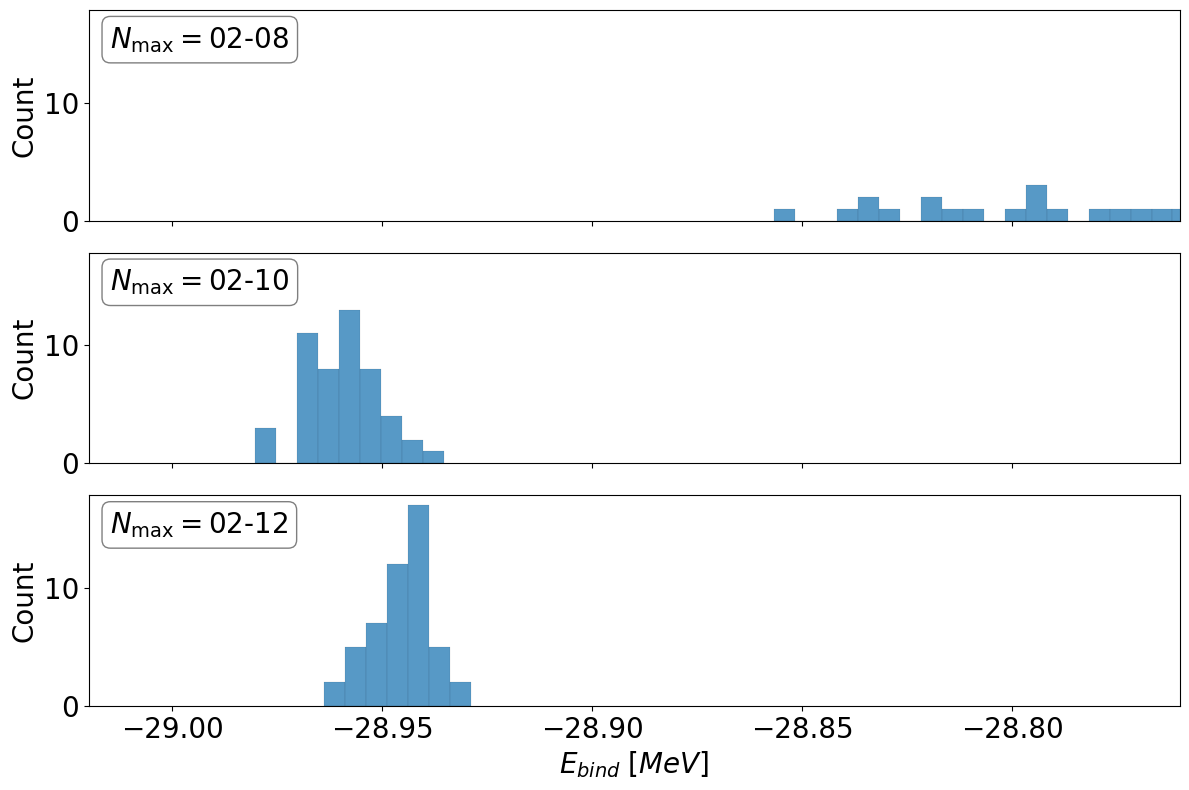

In [20]:
plot_counts(E_bind, pred_param, kde=False, save=save_figs)

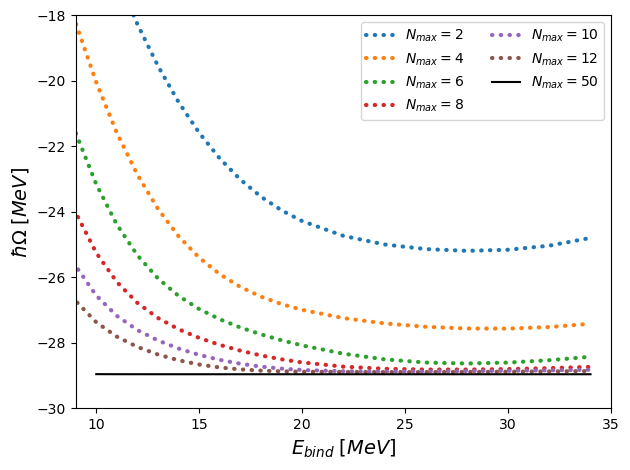

In [12]:
plot_prediction(nuclei_df, pred_df, pred_param, val_sep, save=save_figs)

# References
Relevant references:

1. W.G. Jiang, et al, "Extrapolation of nuclear structure observables with artificial neural networks", ArXiv, 2019, <br>
https://arxiv.org/abs/1905.06317

2. G.A. Negoita, et al, "Deep Learning: A Tool for Computational Nuclear Physics", ArXiv, 2018, <br>
https://arxiv.org/abs/1803.03215

3. S.K. Bogner, et al, "Convergence in the no-core shell model with low-momentum two-nucleon interactions", ArXiv, 2007, <br>
https://arxiv.org/abs/0708.3754